## Libraries import

In [7]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
#train test split
from sklearn.model_selection import train_test_split
#models
from sklearn.linear_model import Lasso
#error
from sklearn.metrics import mean_squared_error

## Data import

In [5]:
# Impor train data
df_diamonds_train=pd.read_csv('../data/diamonds_train.csv')
df_diamonds_train.pop("Unnamed: 0")
df_diamonds_train

,index_id,depth,table,x,y,z,price,carat,cut,color,clarity,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,1.21,Premium,J,VS2,Dubai
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,505,0.32,Very Good,H,VS2,Kimberly
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,2686,0.71,Fair,G,VS1,Las Vegas
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,738,0.41,Good,D,SI1,Kimberly
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,4882,1.02,Ideal,G,SI1,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,10070,1.34,Ideal,G,VS1,Antwerp
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,12615,2.02,Good,F,SI2,Madrid
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,5457,1.01,Ideal,H,SI1,Kimberly
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,456,0.33,Ideal,J,VS1,Kimberly


In [6]:
# Import test data
df_diamonds_test=pd.read_csv('../data/diamonds_test.csv')
df_diamonds_test

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat


## Data prep

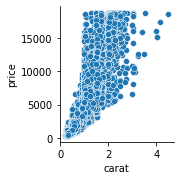

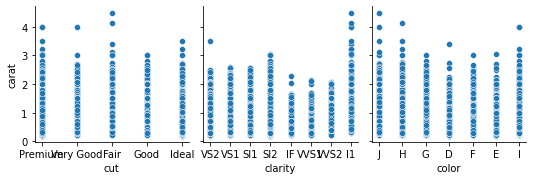

In [12]:
# plot price vs. carat
sns.pairplot(df_diamonds_train,x_vars=['carat'], y_vars = ['price'])
# plot carat vs other Cs
sns.pairplot(df_diamonds_train, x_vars=['cut','clarity','color'], y_vars = ['carat'])
plt.show()


We can see that the properties charts reveal a lot about how and where bulk of diamonds fall under each property value e.g. most bigger diamonds (higher carat) fall in Fair cut, I1 clarity and H-I color. These are poor (commercial grade) diamonds generally sold by retail jewelry shops across the world to attract consumers with advertisements like ‘Diamonds at 50% off’

The price vs. carat chart also show that there are some outliers in the dataset i.e. few diamonds that are really over priced!

In [13]:
def histplot(df, listvar):
    fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(20, 3))
    counter=0
    for ax in axes:
        df.hist(column=listvar[counter], bins=20, ax=axes[counter])
        plt.ylabel('Price')
        plt.xlabel(listvar[counter])
        counter = counter+1
        plt.show()

In [14]:
linear_vars = df_diamonds_train.select_dtypes(include=[np.number]).columns
display(list(linear_vars))

['depth', 'table', 'x', 'y', 'z', 'price', 'carat']

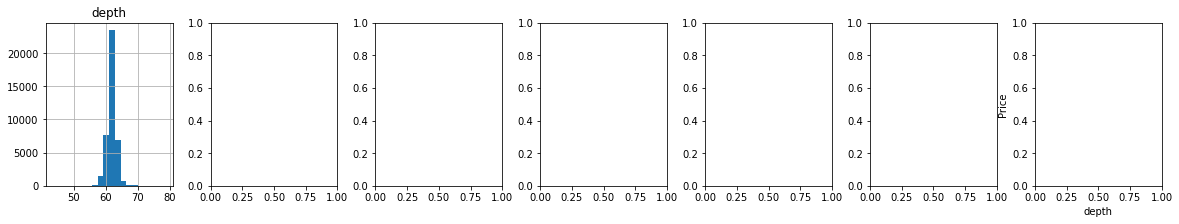

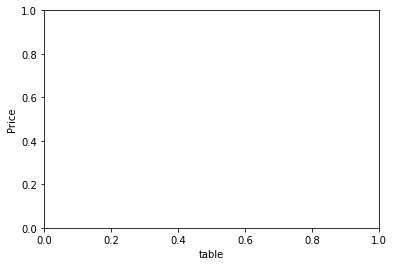

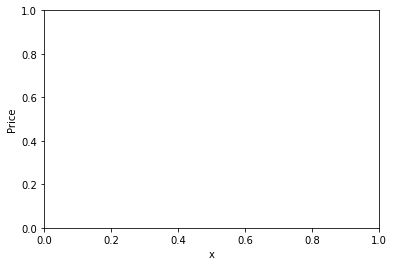

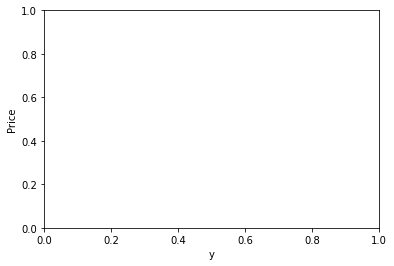

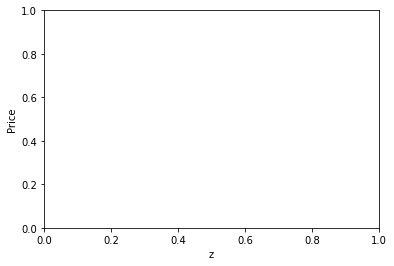

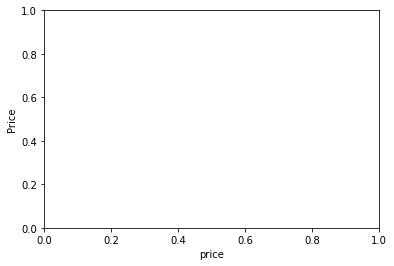

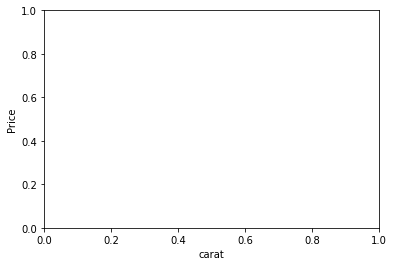

In [15]:
histplot(df_diamonds_train,linear_vars)

One of the key steps in Machine learning process is to convert features having bimodal distribution to ones with BINOMIAL distribution

In [17]:
#Check for any ZERO value
print('0 values →', 0 in df_diamonds_train.values)
df_diamonds_train[linear_vars] = df_diamonds_train[linear_vars] + 0.01
print('Filled all 0 values with 0.01. Now any 0 values? →', 0 in df_diamonds_train.values)

0 values → True
Filled all 0 values with 0.01. Now any 0 values? → False


In [19]:
#View and remove outliers using z-score
def sorteddf(df_diamonds_train, listvar):
    for var in listvar:
        display('sorted by ' + var + ' --> ' + str(list(df_diamonds_train[listvar].sort_values(by=var,ascending=False)[var].head())))

In [20]:
sorteddf(df_diamonds_train, linear_vars)

'sorted by depth --> [79.01, 73.61, 72.91000000000001, 72.21000000000001, 71.81]'

'sorted by table --> [95.01, 79.01, 76.01, 73.01, 73.01]'

'sorted by x --> [10.24, 10.15, 10.03, 10.02, 10.01]'

'sorted by y --> [58.91, 10.17, 10.11, 9.95, 9.95]'

'sorted by z --> [8.07, 6.7299999999999995, 6.4399999999999995, 6.319999999999999, 6.279999999999999]'

'sorted by price --> [18823.01, 18818.01, 18806.01, 18797.01, 18795.01]'

'sorted by carat --> [4.51, 4.14, 4.02, 4.02, 4.01]'

In [21]:
def dfboxplot(df, listvar):
    fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(20, 3))
    counter=0
    for ax in axes:
        df.boxplot(column=listvar[counter], ax=axes[counter])
        plt.ylabel('Price')
        plt.xlabel(listvar[counter])
        counter = counter+1
        plt.show()

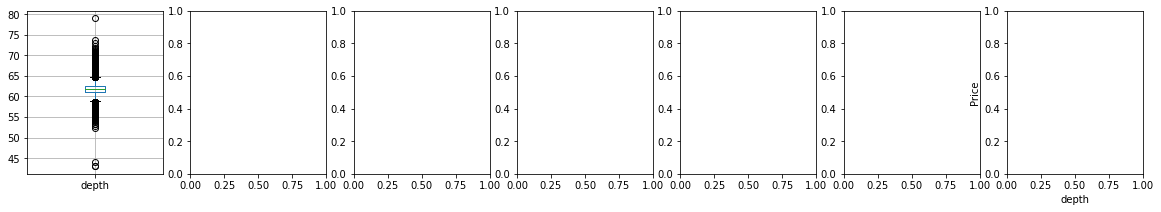

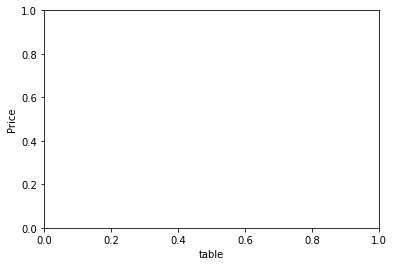

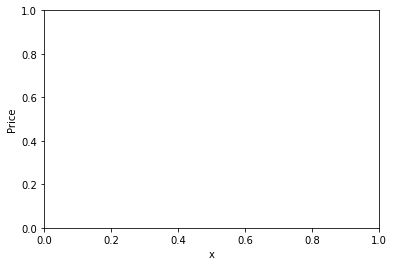

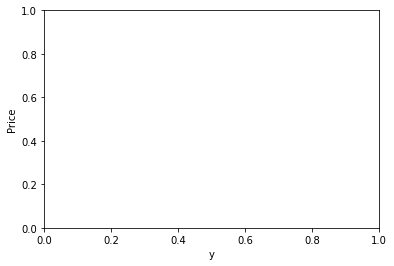

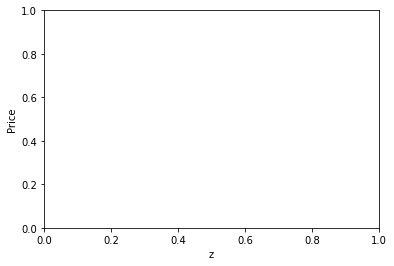

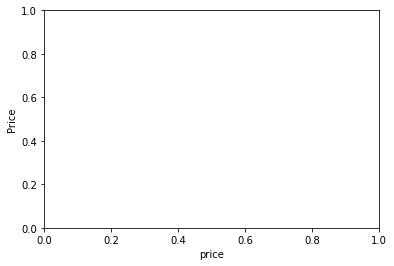

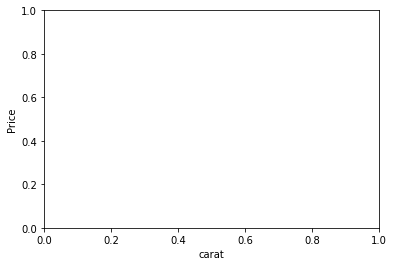

In [22]:
dfboxplot(df_diamonds_train, linear_vars)

In [26]:
#removeoutliers
def removeoutliers(df, listvars, z):
    from scipy import stats
    for var in listvars:
        df1 = df[np.abs(stats.zscore(df[var])) < z]
    return df1
df = removeoutliers(df_diamonds_train, linear_vars,2)

In [27]:
df

,index_id,depth,table,x,y,z,price,carat,cut,color,clarity,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.41,58.01,6.84,6.80,4.26,4268.01,1.22,Premium,J,VS2,Dubai
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.01,57.01,4.36,4.39,2.76,505.01,0.33,Very Good,H,VS2,Kimberly
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.51,55.01,5.63,5.54,3.66,2686.01,0.72,Fair,G,VS1,Las Vegas
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.81,56.01,4.69,4.73,3.01,738.01,0.42,Good,D,SI1,Kimberly
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.51,59.01,6.56,6.52,3.96,4882.01,1.03,Ideal,G,SI1,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...
40449,1726e8e229489b353e6007fac1dfffb5300a96bf6166cf...,61.91,56.01,5.70,5.73,3.54,3710.01,0.72,Ideal,F,VS1,Kimberly
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.71,57.01,7.11,7.05,4.44,10070.01,1.35,Ideal,G,VS1,Antwerp
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.71,56.01,6.38,6.43,4.02,5457.01,1.02,Ideal,H,SI1,Kimberly
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.91,54.31,4.46,4.48,2.77,456.01,0.34,Ideal,J,VS1,Kimberly


In [30]:
# Convert to log scale
# this log converts dataframe's features inplace
def convertfeatures2log(df, listvars):
    for var in listvars:
        df[var] = np.log(df[var])convertfeatures2log(df, linear_vars)
        histplot(df, linear_vars)

SyntaxError: invalid syntax (2569719661.py, line 5)